In [ ]:
import keras
from keras.models import Sequential 
from keras.layers import Dense,Activation,Dropout 
from keras.layers.normalization import BatchNormalization 
from keras.utils import np_utils
import numpy as np
import pandas as pd
import statistics
import pylab
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix




print("Alunos: Gabriel Barbosa Menezes Dantas e Lucas Matheus Carvalho de Assis")
print("Este bloco inicializa as bibliotecas utilizadas na atividade.")

Alunos: Gabriel Barbosa Menezes Dantas e Lucas Matheus Carvalho de Assis
Este bloco inicializa as bibliotecas utilizadas na atividade.


In [ ]:
print("Questão 1, item a): organizando o dataset e o dividindo entre conjuntos de treino, teste e validação.")
X = pd.DataFrame(
    {'sepalL' : [5.1,4.9,4.7,4.6,5.0,5.4,4.6,5.0,4.4,4.9,5.4,4.8,4.8,4.3,5.8,5.7,5.4,5.1,5.7,5.1,5.4,5.1,4.6,5.1,4.8,5.0,5.0,5.2,5.2,4.7,4.8,5.4,5.2,5.5,4.9,5.0,5.5,4.9,4.4,5.1,5.0,4.5,4.4,5.0,5.1,4.8,5.1,4.6,5.3,5.0,7.0,6.4,6.9,5.5,6.5,5.7,6.3,4.9,6.6,5.2,5.0,5.9,6.0,6.1,5.6,6.7,5.6,5.8,6.2,5.6,5.9,6.1,6.3,6.1,6.4,6.6,6.8,6.7,6.0,5.7,5.5,5.5,5.8,6.0,5.4,6.0,6.7,6.3,5.6,5.5,5.5,6.1,5.8,5.0,5.6,5.7,5.7,6.2,5.1,5.7,6.3,5.8,7.1,6.3,6.5,7.6,4.9,7.3,6.7,7.2,6.5,6.4,6.8,5.7,5.8,6.4,6.5,7.7,7.7,6.0,6.9,5.6,7.7,6.3,6.7,7.2,6.2,6.1,6.4,7.2,7.4,7.9,6.4,6.3,6.1,7.7,6.3,6.4,6.0,6.9,6.7,6.9,5.8,6.8,6.7,6.7,6.3,6.5,6.2,5.9],
'sepalW' : [3.5,3.0,3.2,3.1,3.6,3.9,3.4,3.4,2.9,3.1,3.7,3.4,3.0,3.0,4.0,4.4,3.9,3.5,3.8,3.8,3.4,3.7,3.6,3.3,3.4,3.0,3.4,3.5,3.4,3.2,3.1,3.4,4.1,4.2,3.1,3.2,3.5,3.6,3.0,3.4,3.5,2.3,3.2,3.5,3.8,3.0,3.8,3.2,3.7,3.3,3.2,3.2,3.1,2.3,2.8,2.8,3.3,2.4,2.9,2.7,2.0,3.0,2.2,2.9,2.9,3.1,3.0,2.7,2.2,2.5,3.2,2.8,2.5,2.8,2.9,3.0,2.8,3.0,2.9,2.6,2.4,2.4,2.7,2.7,3.0,3.4,3.1,2.3,3.0,2.5,2.6,3.0,2.6,2.3,2.7,3.0,2.9,2.9,2.5,2.8,3.3,2.7,3.0,2.9,3.0,3.0,2.5,2.9,2.5,3.6,3.2,2.7,3.0,2.5,2.8,3.2,3.0,3.8,2.6,2.2,3.2,2.8,2.8,2.7,3.3,3.2,2.8,3.0,2.8,3.0,2.8,3.8,2.8,2.8,2.6,3.0,3.4,3.1,3.0,3.1,3.1,3.1,2.7,3.2,3.3,3.0,2.5,3.0,3.4,3.0],
'petalL' : [1.4,1.4,1.3,1.5,1.4,1.7,1.4,1.5,1.4,1.5,1.5,1.6,1.4,1.1,1.2,1.5,1.3,1.4,1.7,1.5,1.7,1.5,1.0,1.7,1.9,1.6,1.6,1.5,1.4,1.6,1.6,1.5,1.5,1.4,1.5,1.2,1.3,1.4,1.3,1.5,1.3,1.3,1.3,1.6,1.9,1.4,1.6,1.4,1.5,1.4,4.7,4.5,4.9,4.0,4.6,4.5,4.7,3.3,4.6,3.9,3.5,4.2,4.0,4.7,3.6,4.4,4.5,4.1,4.5,3.9,4.8,4.0,4.9,4.7,4.3,4.4,4.8,5.0,4.5,3.5,3.8,3.7,3.9,5.1,4.5,4.5,4.7,4.4,4.1,4.0,4.4,4.6,4.0,3.3,4.2,4.2,4.2,4.3,3.0,4.1,6.0,5.1,5.9,5.6,5.8,6.6,4.5,6.3,5.8,6.1,5.1,5.3,5.5,5.0,5.1,5.3,5.5,6.7,6.9,5.0,5.7,4.9,6.7,4.9,5.7,6.0,4.8,4.9,5.6,5.8,6.1,6.4,5.6,5.1,5.6,6.1,5.6,5.5,4.8,5.4,5.6,5.1,5.1,5.9,5.7,5.2,5.0,5.2,5.4,5.1],
'petalW' : [0.2,0.2,0.2,0.2,0.2,0.4,0.3,0.2,0.2,0.1,0.2,0.2,0.1,0.1,0.2,0.4,0.4,0.3,0.3,0.3,0.2,0.4,0.2,0.5,0.2,0.2,0.4,0.2,0.2,0.2,0.2,0.4,0.1,0.2,0.2,0.2,0.2,0.1,0.2,0.2,0.3,0.3,0.2,0.6,0.4,0.3,0.2,0.2,0.2,0.2,1.4,1.5,1.5,1.3,1.5,1.3,1.6,1.0,1.3,1.4,1.0,1.5,1.0,1.4,1.3,1.4,1.5,1.0,1.5,1.1,1.8,1.3,1.5,1.2,1.3,1.4,1.4,1.7,1.5,1.0,1.1,1.0,1.2,1.6,1.5,1.6,1.5,1.3,1.3,1.3,1.2,1.4,1.2,1.0,1.3,1.2,1.3,1.3,1.1,1.3,2.5,1.9,2.1,1.8,2.2,2.1,1.7,1.8,1.8,2.5,2.0,1.9,2.1,2.0,2.4,2.3,1.8,2.2,2.3,1.5,2.3,2.0,2.0,1.8,2.1,1.8,1.8,1.8,2.1,1.6,1.9,2.0,2.2,1.5,1.4,2.3,2.4,1.8,1.8,2.1,2.4,2.3,1.9,2.3,2.5,2.3,1.9,2.0,2.3,1.8]
}
)
y = ['setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica']

X_train, X_temp, y_train, y_temp = train_test_split(X,y,test_size=0.4,random_state = 44)
X_test, X_val, y_test, y_val = train_test_split(X_temp,y_temp,test_size=0.625,random_state = 44)

Questão 1, item a): organizando o dataset e o dividindo entre conjuntos de treino, teste e validação.


In [ ]:
print("Questão 1, item b): montando os modelos neurais: utilizaremos redes de 3 camadas escondidas de 8 neurons cada.")
rede1 = MLPClassifier(hidden_layer_sizes=(8,8,8),random_state=1,max_iter=20,learning_rate_init=0.1,batch_size=20).fit(X_train, y_train)
rede2 = MLPClassifier(hidden_layer_sizes=(8,8,8),random_state=1,max_iter=20,learning_rate_init=0.1,batch_size=10).fit(X_train, y_train)
rede3 = MLPClassifier(hidden_layer_sizes=(8,8,8),random_state=1,max_iter=20,learning_rate_init=0.1,batch_size=1).fit(X_train, y_train)
rede4 = MLPClassifier(hidden_layer_sizes=(8,8,8),random_state=1,max_iter=20,learning_rate_init=0.03,batch_size=20).fit(X_train, y_train)
rede5 = MLPClassifier(hidden_layer_sizes=(8,8,8),random_state=1,max_iter=20,learning_rate_init=0.03,batch_size=10).fit(X_train, y_train)
rede6 = MLPClassifier(hidden_layer_sizes=(8,8,8),random_state=1,max_iter=20,learning_rate_init=0.03,batch_size=1).fit(X_train, y_train)
rede7 = MLPClassifier(hidden_layer_sizes=(8,8,8),random_state=1,max_iter=20,learning_rate_init=0.01,batch_size=20).fit(X_train, y_train)
rede8 = MLPClassifier(hidden_layer_sizes=(8,8,8),random_state=1,max_iter=20,learning_rate_init=0.01,batch_size=10).fit(X_train, y_train)
rede9 = MLPClassifier(hidden_layer_sizes=(8,8,8),random_state=1,max_iter=20,learning_rate_init=0.01,batch_size=1).fit(X_train, y_train)
rede10 = MLPClassifier(hidden_layer_sizes=(8,8,8),random_state=1,max_iter=20,learning_rate_init=0.003,batch_size=20).fit(X_train, y_train)
rede11 = MLPClassifier(hidden_layer_sizes=(8,8,8),random_state=1,max_iter=20,learning_rate_init=0.003,batch_size=10).fit(X_train, y_train)
rede12 = MLPClassifier(hidden_layer_sizes=(8,8,8),random_state=1,max_iter=20,learning_rate_init=0.003,batch_size=1).fit(X_train, y_train)
rede13 = MLPClassifier(hidden_layer_sizes=(8,8,8),random_state=1,max_iter=20,learning_rate_init=0.001,batch_size=20).fit(X_train, y_train)
rede14 = MLPClassifier(hidden_layer_sizes=(8,8,8),random_state=1,max_iter=20,learning_rate_init=0.001,batch_size=10).fit(X_train, y_train)
rede15 = MLPClassifier(hidden_layer_sizes=(8,8,8),random_state=1,max_iter=20,learning_rate_init=0.001,batch_size=1).fit(X_train, y_train)

Questão 1, item b): montando os modelos neurais: utilizaremos redes de 3 camadas escondidas de 8 neurons cada.


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr

In [ ]:
print("Acurácia da rede 1: ",rede1.score(X_val, y_val))
print("Acurácia da rede 2: ",rede2.score(X_val, y_val))
print("Acurácia da rede 3: ",rede3.score(X_val, y_val))
print("Acurácia da rede 4: ",rede4.score(X_val, y_val))
print("Acurácia da rede 5: ",rede5.score(X_val, y_val))
print("Acurácia da rede 6: ",rede6.score(X_val, y_val))
print("Acurácia da rede 7: ",rede7.score(X_val, y_val))
print("Acurácia da rede 8: ",rede8.score(X_val, y_val))
print("Acurácia da rede 9: ",rede9.score(X_val, y_val))
print("Acurácia da rede 10: ",rede10.score(X_val, y_val))
print("Acurácia da rede 11: ",rede11.score(X_val, y_val))
print("Acurácia da rede 12: ",rede12.score(X_val, y_val))
print("Acurácia da rede 13: ",rede13.score(X_val, y_val))
print("Acurácia da rede 14: ",rede14.score(X_val, y_val))
print("Acurácia da rede 15: ",rede15.score(X_val, y_val))
print("Observando as acurácias acima, decidimos utilizar as redes 1, 4 e 7.")
print("Escolhemos elas pois parecem ser mais confiáveis por terem um batch-size maior,")
print("possuírem acurácia 1 para o conjunto de validação e por quê as redes de mesmo")
print("learning rate inicial com menor batch-size ainda têm acurácia relativamente alta.")

Acurácia da rede 1:  1.0
Acurácia da rede 2:  0.9473684210526315
Acurácia da rede 3:  0.2631578947368421
Acurácia da rede 4:  1.0
Acurácia da rede 5:  0.9736842105263158
Acurácia da rede 6:  0.7105263157894737
Acurácia da rede 7:  1.0
Acurácia da rede 8:  1.0
Acurácia da rede 9:  0.8947368421052632
Acurácia da rede 10:  0.7631578947368421
Acurácia da rede 11:  0.9473684210526315
Acurácia da rede 12:  1.0
Acurácia da rede 13:  0.2631578947368421
Acurácia da rede 14:  0.5789473684210527
Acurácia da rede 15:  1.0
Observando as acurácias acima, decidimos utilizar as redes 1, 4 e 7.
Escolhemos elas pois parecem ser mais confiáveis por terem um batch-size maior,
possuírem acurácia 1 para o conjunto de validação e por quê as redes de mesmo
learning rate inicial com menor batch-size ainda têm acurácia relativamente alta.


Questão 1, item c): agora vamos utilizar o conjunto de testes para avaliar as redes escolhidas.
Teste de Acurácia do sklearn:  0.9545454545454546
Há um falso negativo e dois falsos positivos, como podemos ver na matriz de confusão não-normalizada.
Confusion matrix, without normalization
[[6 0 0]
 [0 6 1]
 [0 0 9]]
Normalized confusion matrix
[[1.         0.         0.        ]
 [0.         0.85714286 0.14285714]
 [0.         0.         1.        ]]


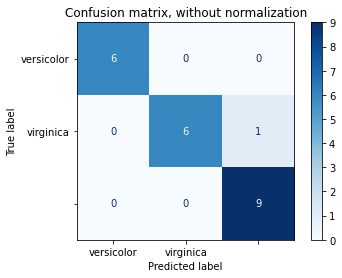

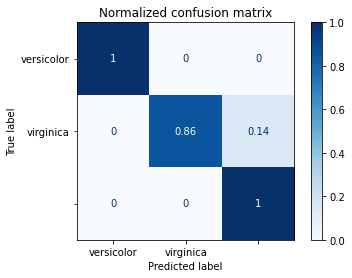

In [ ]:
print("Questão 1, item c): agora vamos utilizar o conjunto de testes para avaliar as redes escolhidas.")
print("Análise da rede 1:")

print("Teste de Acurácia do sklearn: ",accuracy_score(y_test, rede1.predict(X_test)))

print("Há um falso positivo, como podemos ver na matriz de confusão não-normalizada.")

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(rede1, X_test, y_test,
                                 display_labels=['versicolor', 'virginica'],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Análise da rede 4:
Teste de Acurácia do sklearn:  1.0
Não há falsos positivos ou negativos.
Confusion matrix, without normalization
[[6 0 0]
 [0 7 0]
 [0 0 9]]
Normalized confusion matrix
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


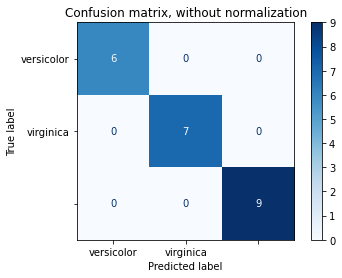

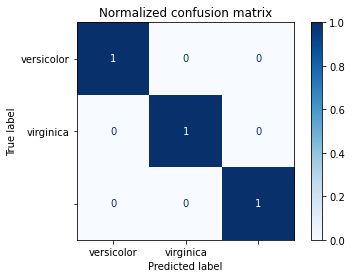

In [ ]:
print("Análise da rede 4:")

print("Teste de Acurácia do sklearn: ",accuracy_score(y_test, rede4.predict(X_test)))

print("Não há falsos positivos ou negativos.")

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(rede4, X_test, y_test,
                                 display_labels=['versicolor', 'virginica'],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Análise da rede 7:
Teste de Acurácia do sklearn:  1.0
Não há falsos positivos ou negativos.
Confusion matrix, without normalization
[[6 0 0]
 [0 7 0]
 [0 0 9]]
Normalized confusion matrix
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


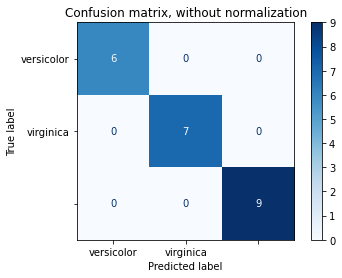

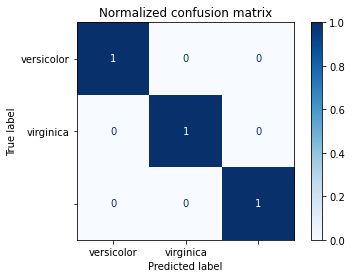

In [ ]:
print("Análise da rede 7:")

print("Teste de Acurácia do sklearn: ",accuracy_score(y_test, rede7.predict(X_test)))

print("Não há falsos positivos ou negativos.")

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(rede7, X_test, y_test,
                                 display_labels=['versicolor', 'virginica'],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
print("Podemos ver que a rede 1 é menos precisa do que parecia.")
print("As redes 4 e 7 parecem idênticas, então vamos comparar suas perdas.")

print("Perda da rede 4: ",rede4.loss_)
print("Perda da rede 7: ",rede7.loss_)

print("Podemos ver então que a estrutura da rede 7 promove muito mais perda de dados.")
print("Vamos escolher então a rede 4 como a melhor.")

Podemos ver que a rede 1 é menos precisa do que parecia.
As redes 4 e 7 parecem idênticas, então vamos comparar suas perdas.
Perda da rede 4:  0.09213349799028961
Perda da rede 7:  0.40647327900685115
Podemos ver então que a estrutura da rede 7 promove muito mais perda de dados.
Vamos escolher então a rede 4 como a melhor.


Questão 1, item d): Bateria de testes da rede 4.
Teste de Acurácia do sklearn:  0.98
Há três falsos positivos.
Confusion matrix, without normalization
[[50  0  0]
 [ 0 47  3]
 [ 0  0 50]]
Normalized confusion matrix
[[1.   0.   0.  ]
 [0.   0.94 0.06]
 [0.   0.   1.  ]]


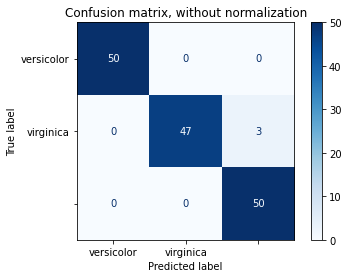

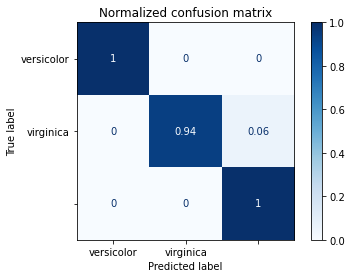

In [ ]:
print("Questão 1, item d): Bateria de testes da rede 4.")

print("Teste de Acurácia do sklearn: ",accuracy_score(y, rede4.predict(X)))
print("Há três falsos positivos.")

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(rede4, X, y,
                                 display_labels=['versicolor', 'virginica'],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
rede4.n_iter_

31

Questão 1, item e): Como não há como retreinar uma rede com a biblioteca sklearn,
iremos treinar a rede 4 com trezentas vezes o número de iterações que havia sido treinada.
Teste de Acurácia do sklearn:  1.0
Não há falsos positivos.
Podemos observar que não houve overtraning
Confusion matrix, without normalization
[[6 0 0]
 [0 7 0]
 [0 0 9]]
Normalized confusion matrix
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


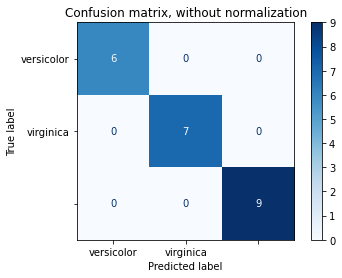

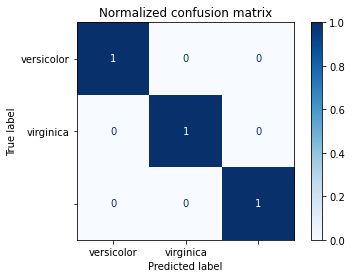

In [ ]:
print("Questão 1, item e): Como não há como retreinar uma rede com a biblioteca sklearn,")
print("iremos treinar a rede 4 com trezentas vezes o número de iterações que havia sido treinada.")

rede4 = MLPClassifier(hidden_layer_sizes=(8,8,8),random_state=1,max_iter=60,learning_rate_init=0.03,batch_size=20,warm_start=True).fit(X_train, y_train)

print("Teste de Acurácia do sklearn: ",accuracy_score(y_test, rede4.predict(X_test)))
print("Não há falsos positivos.")
print("Podemos observar que não houve overtraning, mas podemos atribuir isto à biblioteca")
print("sklearn, pois seu classificador para de iterar ao convergir.")

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(rede4, X_test, y_test,
                                 display_labels=['versicolor', 'virginica'],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
print("Questão 2: inicialização do banco de dados.")

X2_train = pd.DataFrame(
    {'clumpThickness' : [1, 10, 1, 5, 3, 10, 3, 5, 1, 6, 10, 1, 1, 3, 10, 4, 10, 3, 1, 3, 1, 7, 2, 8, 3, 7, 4, 1, 5, 1, 5, 6, 1, 4, 6, 5, 1, 3, 1, 4, 5, 8, 2, 4, 4, 5, 9, 6, 4, 1, 5, 10, 2, 5, 3, 10, 4, 1, 5, 4, 4, 3, 5, 9, 5, 2, 2, 5, 7, 1, 5, 5, 2, 8, 5, 7, 3, 7, 5, 5, 4, 4, 3, 8, 3, 10, 1, 1, 10, 5, 3, 1, 2, 5, 4, 5, 7, 10, 3, 8, 4, 5, 5, 5, 2, 1, 8, 5, 1, 4, 8, 10, 3, 4, 5, 3, 10, 1, 4, 1, 4, 3, 3, 1, 5, 1, 10, 1, 4, 4, 7, 2, 1, 3, 5, 1, 1, 4, 5, 5, 1, 4, 5, 5, 1, 1, 3, 1, 6, 10, 2, 3, 8, 7, 3, 3, 2, 10, 6, 1, 1, 1, 10, 3, 10, 5, 1, 4, 10, 1, 1, 5, 5, 8, 10, 4, 10, 7, 3, 1, 1, 4, 4, 10, 1, 7, 5, 4, 4, 4, 3, 1, 8, 1, 3, 3, 5, 1, 3, 3, 1, 10, 2, 5, 8, 9, 4, 1, 10, 5, 6, 1, 5, 3, 5, 1, 1, 1, 6, 5, 3, 3, 2, 4, 3, 7, 1, 10, 6, 8, 1, 8, 10, 5, 10, 8, 1, 3, 2, 5, 2, 5, 5, 3, 8, 1, 3, 5, 4, 4, 4, 7, 2, 2, 7, 1, 3, 5, 3, 6, 5, 1, 1, 5, 2, 1, 1, 5, 10, 7, 5, 1, 3, 1, 5, 4, 10, 5, 4, 1, 5, 1, 2, 1, 4, 3, 8, 10, 1, 2, 3, 6, 4, 6, 3, 6, 1, 3, 10, 5, 6, 1, 1, 9, 1, 1, 10, 8, 2, 5, 4, 8, 3, 2, 5, 3, 10, 10, 5, 10, 5, 1, 5, 1, 10, 1, 5, 1, 1, 1, 7, 8, 8, 5, 8, 4, 2, 1, 2, 5, 8, 8, 2, 1, 1, 2, 4, 3, 3, 3, 1, 10, 10, 3, 5, 2, 2, 4, 5, 2, 1, 5, 10, 8, 5, 2, 1, 3, 1, 4, 5, 7, 1, 3, 4, 3, 6, 5, 6, 5, 3, 6, 5, 5, 7, 3, 1, 2, 5, 3, 3, 1, 5, 4, 9, 3, 6, 5, 4, 4, 1, 3, 5, 10, 5, 4, 10, 2, 10, 3, 8, 5, 6, 1, 4, 5, 3, 10, 8, 2, 8, 5, 10, 4, 8, 3, 5, 1, 5, 5, 5, 1, 1, 10, 5, 5, 1, 4, 6, 5, 3, 10, 1, 4, 2, 2, 3, 4, 1, 5, 4, 10, 9, 1, 10, 7, 2, 2, 4, 5, 3, 8, 5, 9, 1, 2, 8, 10, 4, 3, 3, 5, 10, 3, 9, 8, 5, 6],
'uniformityOfCellSize' : [1, 4, 1, 4, 1, 3, 6, 1, 1, 1, 5, 2, 2, 2, 3, 1, 10, 1, 1, 1, 1, 2, 1, 8, 1, 1, 1, 1, 1, 3, 1, 10, 1, 5, 1, 1, 1, 3, 1, 8, 1, 3, 3, 1, 1, 1, 10, 1, 1, 1, 3, 4, 1, 1, 1, 10, 2, 1, 6, 1, 1, 1, 1, 10, 2, 1, 1, 1, 5, 1, 10, 3, 1, 4, 1, 4, 1, 5, 10, 1, 1, 1, 1, 10, 1, 3, 1, 1, 5, 10, 7, 2, 1, 4, 1, 1, 8, 3, 1, 8, 1, 1, 1, 3, 1, 1, 2, 1, 1, 1, 10, 9, 3, 1, 4, 1, 10, 1, 4, 4, 2, 1, 3, 1, 6, 1, 9, 1, 1, 3, 4, 1, 1, 1, 8, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 5, 10, 1, 2, 5, 4, 1, 1, 1, 10, 1, 1, 1, 1, 10, 1, 10, 3, 1, 1, 10, 1, 6, 1, 8, 9, 5, 1, 3, 8, 3, 1, 1, 2, 2, 4, 1, 3, 1, 1, 8, 3, 1, 3, 6, 1, 1, 1, 1, 2, 1, 10, 1, 10, 1, 1, 10, 9, 7, 1, 10, 4, 10, 2, 7, 4, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 2, 5, 1, 6, 2, 10, 1, 3, 6, 10, 10, 6, 1, 1, 1, 2, 1, 3, 1, 1, 3, 1, 1, 7, 1, 2, 1, 6, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 3, 1, 10, 8, 2, 1, 4, 1, 7, 1, 7, 1, 3, 1, 5, 1, 1, 1, 1, 1, 6, 8, 1, 1, 1, 10, 2, 1, 1, 8, 1, 1, 2, 1, 8, 1, 1, 5, 1, 1, 4, 7, 1, 1, 1, 4, 1, 1, 4, 1, 10, 6, 1, 8, 3, 2, 10, 1, 4, 1, 6, 2, 1, 1, 3, 10, 7, 7, 10, 1, 1, 1, 5, 1, 7, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 10, 4, 3, 1, 1, 1, 4, 1, 3, 1, 1, 8, 4, 10, 1, 1, 1, 1, 1, 3, 5, 1, 2, 1, 1, 3, 2, 10, 8, 1, 10, 2, 3, 2, 4, 1, 3, 2, 1, 1, 1, 1, 1, 7, 1, 10, 1, 2, 1, 1, 1, 6, 7, 3, 8, 10, 1, 5, 2, 2, 1, 10, 1, 1, 1, 1, 10, 5, 1, 7, 3, 4, 1, 10, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 10, 1, 3, 1, 7, 1, 1, 1, 1, 1, 1, 1, 2, 1, 6, 1, 1, 8, 6, 1, 7, 4, 1, 1, 7, 1, 5, 1, 1, 6, 4, 8, 6, 2, 5, 10, 3, 6, 10, 3, 9],
'uniformityOfCellShape' : [1, 7, 1, 6, 2, 5, 6, 1, 1, 3, 7, 2, 3, 1, 3, 1, 10, 1, 1, 1, 1, 4, 1, 9, 1, 2, 1, 1, 1, 1, 1, 5, 1, 5, 3, 1, 1, 2, 1, 6, 3, 8, 1, 1, 1, 1, 10, 1, 1, 1, 4, 6, 2, 1, 1, 10, 2, 1, 6, 1, 1, 1, 2, 10, 2, 1, 1, 1, 3, 1, 10, 4, 1, 4, 1, 5, 2, 6, 10, 1, 1, 1, 1, 10, 1, 4, 1, 1, 5, 10, 7, 2, 1, 5, 1, 1, 8, 5, 1, 9, 1, 2, 3, 3, 1, 1, 4, 1, 1, 1, 10, 8, 1, 1, 6, 1, 6, 1, 4, 3, 1, 1, 5, 2, 5, 1, 7, 1, 1, 3, 6, 1, 1, 1, 4, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 5, 10, 1, 2, 5, 7, 1, 1, 1, 8, 1, 1, 1, 1, 10, 1, 10, 3, 1, 1, 10, 1, 8, 1, 7, 9, 5, 1, 3, 3, 5, 1, 3, 1, 4, 4, 1, 2, 1, 1, 8, 2, 1, 3, 4, 1, 1, 1, 1, 3, 1, 7, 1, 10, 1, 1, 8, 10, 8, 1, 10, 4, 10, 1, 10, 5, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 2, 6, 1, 6, 3, 10, 1, 5, 3, 10, 10, 5, 1, 1, 1, 2, 1, 2, 1, 1, 4, 1, 1, 7, 1, 2, 1, 3, 1, 1, 10, 1, 1, 1, 1, 1, 1, 1, 3, 5, 1, 1, 1, 2, 10, 7, 3, 1, 5, 1, 10, 2, 7, 1, 1, 1, 5, 1, 1, 1, 2, 1, 7, 4, 1, 1, 1, 10, 3, 1, 1, 7, 1, 1, 2, 1, 7, 1, 1, 8, 1, 1, 3, 8, 1, 1, 1, 10, 1, 1, 6, 1, 10, 5, 1, 7, 5, 3, 10, 2, 3, 1, 7, 2, 1, 1, 4, 10, 8, 9, 10, 1, 3, 1, 7, 1, 6, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 9, 5, 2, 2, 1, 1, 2, 3, 4, 1, 1, 8, 6, 10, 1, 1, 1, 1, 4, 6, 6, 1, 2, 1, 1, 2, 2, 10, 8, 1, 10, 2, 1, 4, 4, 1, 1, 2, 1, 1, 1, 3, 1, 7, 1, 10, 1, 1, 1, 1, 1, 6, 7, 5, 7, 8, 1, 5, 1, 3, 1, 10, 1, 1, 1, 1, 10, 6, 1, 8, 3, 6, 2, 10, 1, 2, 1, 2, 2, 1, 3, 1, 1, 2, 1, 1, 8, 3, 4, 1, 7, 1, 1, 1, 1, 1, 1, 2, 4, 1, 4, 2, 1, 10, 4, 1, 10, 4, 1, 1, 5, 4, 5, 1, 1, 4, 5, 6, 4, 2, 5, 10, 6, 9, 10, 3, 7],
'marginalAdhesion' : [1, 2, 3, 6, 1, 4, 6, 1, 1, 1, 3, 1, 1, 1, 10, 1, 10, 1, 1, 1, 1, 1, 1, 4, 1, 3, 1, 1, 1, 1, 1, 5, 1, 10, 1, 1, 1, 1, 1, 4, 3, 3, 1, 1, 1, 1, 10, 1, 1, 1, 1, 1, 1, 2, 1, 8, 1, 1, 8, 2, 1, 1, 1, 1, 2, 1, 2, 3, 7, 1, 10, 1, 2, 1, 1, 10, 2, 3, 3, 1, 1, 1, 1, 10, 1, 5, 1, 1, 6, 6, 4, 1, 1, 1, 1, 1, 7, 1, 1, 6, 1, 1, 1, 3, 1, 1, 1, 1, 1, 2, 7, 7, 1, 1, 8, 1, 3, 1, 4, 10, 1, 1, 2, 1, 6, 1, 3, 1, 1, 1, 4, 1, 1, 1, 10, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 7, 1, 3, 5, 4, 1, 1, 1, 6, 3, 1, 1, 1, 3, 1, 10, 1, 1, 1, 10, 1, 10, 1, 7, 5, 6, 1, 1, 7, 2, 1, 1, 1, 3, 10, 1, 10, 3, 1, 5, 1, 2, 2, 10, 1, 1, 3, 1, 1, 1, 8, 1, 10, 2, 1, 8, 3, 3, 1, 6, 5, 10, 3, 10, 2, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 2, 10, 1, 2, 1, 1, 1, 4, 6, 9, 3, 4, 2, 1, 1, 2, 1, 8, 1, 1, 9, 1, 1, 1, 2, 1, 1, 2, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 8, 1, 1, 2, 10, 4, 2, 4, 1, 3, 1, 6, 1, 4, 1, 1, 1, 2, 1, 1, 1, 1, 4, 3, 4, 1, 1, 1, 2, 5, 1, 1, 5, 1, 1, 1, 1, 8, 1, 3, 1, 1, 1, 1, 5, 1, 1, 1, 5, 2, 1, 10, 3, 1, 8, 1, 4, 5, 1, 5, 1, 10, 1, 8, 1, 1, 1, 4, 10, 5, 8, 8, 1, 2, 1, 6, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 4, 2, 1, 1, 1, 1, 1, 4, 1, 1, 2, 3, 10, 1, 2, 2, 1, 1, 1, 10, 1, 3, 1, 1, 1, 2, 10, 8, 1, 10, 2, 2, 1, 10, 2, 1, 4, 3, 1, 1, 1, 1, 5, 1, 2, 3, 1, 3, 1, 1, 2, 3, 1, 10, 10, 1, 3, 1, 1, 1, 10, 1, 1, 1, 1, 8, 2, 1, 7, 2, 4, 1, 10, 1, 1, 3, 2, 1, 1, 2, 1, 1, 1, 1, 1, 5, 2, 3, 1, 6, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 6, 1, 1, 8, 1, 10, 2, 2, 1, 10, 1, 2, 1, 1, 3, 5, 3, 10, 1, 6, 2, 4, 2, 10, 3, 5],
'singleEpithelialCellSize' : [2, 2, 2, 4, 2, 3, 5, 2, 2, 4, 3, 2, 2, 2, 2, 2, 10, 2, 2, 2, 2, 3, 2, 5, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 3, 2, 4, 5, 2, 2, 3, 10, 2, 2, 2, 4, 2, 2, 1, 2, 6, 2, 1, 6, 2, 2, 2, 2, 10, 2, 2, 2, 2, 4, 2, 5, 8, 2, 2, 2, 2, 2, 3, 8, 2, 2, 2, 2, 8, 2, 3, 2, 2, 3, 10, 4, 2, 2, 8, 2, 2, 3, 10, 2, 6, 2, 2, 2, 2, 2, 1, 5, 2, 1, 2, 10, 6, 2, 2, 4, 2, 3, 2, 6, 4, 2, 2, 3, 2, 10, 2, 4, 2, 2, 2, 6, 1, 1, 1, 5, 2, 1, 2, 2, 3, 2, 2, 2, 1, 2, 2, 3, 2, 4, 9, 2, 2, 2, 3, 2, 2, 2, 4, 2, 2, 2, 2, 10, 2, 3, 2, 2, 2, 6, 1, 8, 2, 10, 3, 8, 2, 2, 4, 3, 2, 2, 2, 2, 6, 2, 5, 2, 3, 4, 3, 3, 2, 10, 1, 1, 2, 2, 2, 3, 5, 2, 10, 2, 2, 4, 6, 4, 1, 8, 7, 4, 2, 5, 6, 2, 2, 2, 2, 4, 2, 2, 1, 3, 2, 2, 5, 3, 4, 2, 3, 2, 5, 4, 6, 10, 3, 1, 2, 2, 2, 2, 5, 2, 2, 3, 2, 3, 5, 2, 2, 2, 5, 2, 2, 3, 2, 3, 2, 1, 2, 2, 3, 2, 10, 3, 2, 2, 4, 8, 4, 2, 2, 7, 2, 5, 2, 5, 2, 2, 2, 5, 2, 1, 2, 2, 3, 3, 4, 2, 2, 2, 8, 3, 1, 1, 6, 2, 2, 2, 2, 6, 2, 1, 2, 2, 2, 3, 5, 2, 2, 2, 4, 2, 2, 2, 2, 6, 5, 2, 3, 3, 2, 4, 2, 3, 2, 8, 2, 2, 2, 3, 6, 10, 6, 5, 2, 2, 2, 4, 2, 4, 3, 2, 2, 2, 2, 2, 2, 2, 2, 1, 7, 3, 3, 2, 2, 2, 2, 2, 2, 10, 2, 3, 3, 10, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 3, 1, 10, 5, 2, 8, 3, 2, 6, 5, 1, 2, 2, 1, 2, 2, 2, 2, 5, 2, 8, 2, 2, 2, 1, 2, 4, 8, 8, 4, 6, 2, 6, 1, 6, 2, 8, 1, 2, 1, 2, 2, 3, 2, 5, 3, 5, 2, 7, 1, 2, 2, 2, 2, 2, 2, 5, 2, 2, 2, 2, 4, 2, 4, 2, 4, 2, 1, 2, 2, 8, 2, 2, 1, 1, 3, 4, 2, 3, 10, 2, 7, 2, 2, 2, 7, 2, 2, 1, 2, 5, 5, 4, 3, 2, 3, 10, 5, 10, 6, 6, 5],
'bareNuclei' : [1, 8, 3, 10, 1, 7, 10, 1, 1, 5, 7, 1, 1, 2, 10, 1, 1, 1, 1, 1, 1, 4, 1, 10, 1, 1, 1, 1, 1, 1, 1, 10, 1, 10, 1, 1, 1, 3, 1, 4, 2, 9, 1, 1, 1, 2, 10, 1, 1, 1, 1, 10, 1, 1, 1, 8, 1, 1, 10, 1, 3, 1, 1, 8, 2, 1, 1, 1, 10, 1, 2, 10, 1, 9, 1, 10, 1, 8, 1, 1, 1, 1, 5, 10, 1, 10, 1, 1, 10, 10, 9, 1, 1, 1, 1, 1, 10, 5, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 10, 4, 1, 1, 1, 1, 10, 1, 5, 10, 1, 1, 10, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 8, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 10, 10, 1, 1, 10, 7, 1, 1, 1, 5, 1, 1, 1, 1, 8, 1, 10, 1, 1, 1, 10, 1, 10, 1, 10, 5, 8, 1, 10, 5, 10, 1, 1, 2, 2, 10, 10, 10, 1, 1, 5, 1, 4, 1, 1, 1, 1, 1, 1, 1, 2, 8, 1, 10, 1, 1, 8, 10, 10, 1, 4, 10, 10, 1, 10, 8, 1, 1, 1, 2, 10, 1, 1, 1, 1, 1, 1, 10, 1, 10, 1, 6, 1, 10, 10, 10, 10, 10, 1, 1, 1, 1, 1, 10, 1, 2, 10, 1, 1, 8, 1, 1, 1, 10, 1, 5, 10, 1, 1, 1, 1, 1, 1, 2, 1, 8, 1, 1, 2, 5, 1, 8, 7, 4, 3, 1, 10, 1, 10, 1, 1, 1, 10, 1, 1, 1, 1, 1, 10, 10, 1, 1, 1, 10, 8, 1, 1, 8, 1, 1, 6, 1, 8, 1, 3, 3, 1, 1, 3, 10, 1, 1, 1, 4, 1, 1, 10, 1, 1, 10, 1, 10, 3, 1, 5, 1, 10, 1, 10, 1, 2, 3, 3, 10, 10, 10, 10, 1, 1, 1, 10, 1, 10, 10, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 1, 1, 1, 1, 5, 1, 5, 1, 1, 4, 1, 2, 1, 1, 1, 1, 1, 1, 10, 1, 3, 1, 1, 4, 1, 10, 10, 4, 10, 1, 1, 10, 1, 3, 1, 4, 1, 1, 1, 1, 1, 10, 1, 10, 1, 1, 1, 1, 1, 10, 5, 10, 10, 5, 1, 7, 1, 3, 1, 10, 1, 3, 1, 1, 10, 10, 1, 5, 1, 10, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 10, 1, 1, 5, 1, 1, 5, 1, 10, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 10, 1, 10, 10, 1, 10, 3, 1, 1, 9, 1, 2, 1, 1, 9, 10, 10, 3, 1, 10, 10, 8, 6, 10, 10, 8],
'blandChromatin' : [1, 6, 1, 4, 3, 3, 6, 2, 1, 5, 3, 1, 2, 3, 7, 2, 8, 2, 3, 2, 1, 3, 3, 7, 3, 2, 2, 3, 2, 2, 1, 6, 2, 7, 3, 3, 1, 3, 3, 10, 2, 8, 1, 3, 1, 2, 10, 2, 2, 3, 3, 5, 3, 2, 2, 7, 2, 2, 4, 2, 1, 3, 1, 3, 3, 3, 3, 1, 7, 1, 8, 4, 3, 3, 1, 3, 1, 7, 5, 3, 3, 3, 1, 10, 1, 4, 1, 2, 7, 10, 4, 2, 1, 3, 3, 1, 7, 3, 2, 10, 1, 3, 3, 4, 2, 2, 5, 3, 3, 2, 7, 7, 1, 1, 8, 3, 4, 3, 7, 5, 2, 3, 7, 4, 3, 1, 7, 1, 1, 3, 4, 3, 3, 2, 9, 3, 3, 1, 2, 1, 1, 3, 2, 3, 1, 2, 3, 3, 3, 7, 1, 1, 4, 7, 3, 1, 2, 8, 1, 2, 3, 1, 8, 1, 10, 2, 2, 3, 8, 3, 5, 1, 5, 7, 7, 1, 7, 7, 7, 3, 1, 3, 2, 5, 3, 5, 1, 1, 10, 2, 1, 7, 3, 1, 2, 2, 3, 3, 1, 7, 2, 4, 1, 2, 7, 7, 9, 1, 8, 3, 7, 1, 10, 4, 3, 3, 1, 1, 7, 2, 1, 2, 2, 1, 3, 7, 1, 9, 1, 3, 2, 1, 7, 7, 9, 6, 1, 2, 1, 2, 1, 8, 2, 3, 3, 1, 2, 3, 1, 2, 3, 7, 1, 1, 9, 2, 2, 1, 2, 3, 3, 2, 1, 7, 2, 1, 5, 2, 8, 3, 3, 1, 4, 1, 7, 2, 5, 2, 4, 2, 4, 1, 2, 1, 2, 2, 3, 3, 1, 2, 2, 7, 7, 1, 2, 8, 1, 2, 1, 3, 8, 3, 1, 2, 3, 1, 6, 9, 3, 2, 3, 7, 1, 2, 4, 1, 2, 8, 1, 7, 4, 1, 4, 2, 7, 2, 3, 1, 2, 3, 3, 10, 7, 8, 7, 1, 2, 1, 7, 2, 5, 3, 3, 2, 2, 3, 1, 1, 2, 2, 3, 3, 7, 1, 3, 2, 3, 2, 2, 2, 1, 2, 8, 4, 10, 1, 3, 1, 3, 1, 1, 5, 3, 3, 3, 3, 4, 2, 8, 7, 1, 10, 1, 2, 5, 3, 1, 2, 1, 3, 1, 2, 2, 2, 7, 1, 7, 1, 1, 3, 3, 2, 3, 7, 5, 7, 10, 3, 7, 2, 7, 1, 7, 2, 2, 1, 2, 4, 6, 3, 5, 3, 7, 1, 4, 1, 2, 1, 1, 3, 3, 3, 3, 5, 1, 1, 1, 10, 1, 4, 2, 4, 2, 2, 1, 1, 5, 3, 2, 1, 2, 3, 7, 1, 5, 9, 1, 4, 2, 2, 2, 5, 3, 5, 1, 1, 3, 4, 7, 3, 2, 3, 5, 4, 2, 10, 3, 4],
'normalNucleoli' : [1, 1, 1, 3, 1, 5, 8, 1, 1, 10, 3, 1, 1, 1, 3, 1, 8, 1, 1, 1, 1, 3, 1, 8, 1, 1, 1, 1, 1, 2, 1, 10, 1, 5, 1, 1, 1, 1, 1, 6, 3, 9, 1, 6, 1, 2, 10, 1, 1, 1, 1, 3, 1, 1, 1, 10, 1, 1, 10, 1, 1, 1, 1, 3, 2, 1, 1, 1, 5, 1, 5, 9, 1, 3, 1, 8, 1, 4, 10, 1, 1, 2, 1, 7, 1, 1, 1, 1, 9, 6, 8, 1, 1, 6, 1, 1, 2, 10, 1, 10, 1, 1, 1, 4, 1, 1, 4, 2, 1, 1, 3, 10, 1, 1, 10, 1, 3, 1, 3, 6, 1, 1, 1, 2, 1, 1, 7, 1, 1, 3, 3, 1, 1, 1, 10, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 4, 10, 1, 1, 3, 6, 1, 1, 1, 10, 1, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 7, 1, 7, 7, 1, 1, 6, 8, 1, 1, 1, 1, 1, 5, 1, 4, 1, 1, 4, 1, 1, 2, 5, 1, 1, 1, 1, 1, 1, 4, 1, 10, 1, 1, 7, 10, 1, 1, 5, 2, 10, 2, 10, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 2, 9, 1, 7, 1, 9, 1, 6, 8, 10, 10, 1, 1, 1, 1, 2, 1, 1, 2, 1, 3, 1, 1, 4, 1, 1, 2, 4, 1, 1, 10, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 10, 8, 6, 1, 6, 1, 5, 1, 7, 1, 8, 3, 3, 1, 1, 1, 1, 2, 4, 10, 1, 1, 1, 3, 6, 1, 1, 9, 1, 1, 1, 1, 9, 1, 1, 1, 1, 1, 5, 10, 1, 1, 1, 10, 1, 1, 1, 1, 8, 6, 1, 9, 10, 1, 4, 1, 1, 1, 10, 1, 1, 1, 2, 10, 2, 10, 8, 2, 1, 1, 6, 1, 1, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 3, 2, 1, 1, 1, 1, 1, 5, 1, 2, 7, 3, 10, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 10, 8, 1, 10, 3, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 8, 1, 3, 1, 1, 1, 1, 1, 6, 4, 3, 5, 3, 1, 10, 1, 1, 1, 10, 1, 1, 1, 1, 1, 6, 1, 10, 1, 1, 1, 8, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 7, 1, 1, 1, 1, 1, 1, 8, 1, 1, 1, 1, 2, 7, 1, 1, 5, 1, 9, 1, 1, 1, 5, 2, 1, 1, 1, 1, 1, 1, 4, 3, 1, 3, 4, 9, 10, 1, 2],
'mitoses' : [1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 8, 1, 1, 1, 3, 1, 8, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 1, 1, 8, 1, 1, 1, 1, 8, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 2, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 2, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 5, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 8, 3, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 10, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 10, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 2, 4, 5, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 5, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 1, 1, 1, 3, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 5, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 1, 7, 10, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 2, 1, 1, 1, 1, 8, 1, 10, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 10, 1, 1, 7, 1, 1, 3, 1, 7, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 7, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 3, 1, 4, 1, 1, 2, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 10, 1, 1, 1]
}
)

y2_train = [2, 4, 2, 4, 2, 4, 4, 2, 2, 4, 4, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 2, 4, 4, 2, 4, 2, 4, 2, 4, 4, 2, 2, 2, 2, 4, 2, 4, 2, 2, 4, 4, 4, 2, 2, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 4, 2, 4, 2, 2, 4, 2, 2, 4, 2, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 4, 2, 4, 2, 4, 4, 4, 2, 4, 4, 4, 2, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 4, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 4, 2, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 4, 4, 2, 2, 2, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 4, 4, 2, 2, 4, 2, 2, 4, 2, 4, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 4, 2, 4, 4, 2, 4, 4, 2, 4, 2, 4, 2, 4, 2, 2, 2, 4, 4, 4, 4, 4, 2, 2, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 2, 4, 4, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 2, 4, 2, 4, 2, 4, 2, 2, 2, 2, 4, 4, 2, 4, 2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 4, 4, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 2]

X2_test = pd.DataFrame(
    {'clumpThickness' : [1, 4, 4, 1, 1, 1, 5, 7, 10, 3, 10, 7, 8, 3, 6, 9, 10, 1, 3, 1, 4, 4, 1, 10, 4, 5, 1, 3, 4, 10, 5, 3, 3, 5, 5, 4, 1, 8, 10, 9, 1, 6, 7, 1, 5, 2, 1, 1, 10, 5, 2, 3, 3, 10, 1, 1, 3, 3, 1, 10, 10, 1, 1, 2, 10, 1, 6, 9, 2, 5, 5, 7, 5, 8, 3, 4, 6, 5, 9, 4, 4, 8, 3, 10, 8, 4, 5, 4, 6, 4, 10, 10, 8, 6, 9, 3, 1, 6, 5, 5, 5, 7, 3, 3, 5, 1, 6, 8, 5, 3, 2, 8, 1, 6, 1, 8, 1, 1, 1, 8, 1, 9, 3, 1, 5, 1, 3, 5, 3, 1, 1, 3, 5, 5, 8, 1, 3, 2, 5, 1, 3, 1, 5, 4, 3, 5, 4, 1, 2, 3, 5, 4, 4, 2, 4, 4, 3, 10, 2, 1, 5, 10, 5, 8, 1, 5, 5, 1, 1, 10, 5, 3, 4, 5, 5, 1, 6, 3, 3, 2, 3, 10, 6, 10, 3, 8, 3, 6, 3, 4, 1, 1, 4, 2, 3, 3, 4, 5, 2, 5, 3, 10, 5, 1, 3],
'uniformityOfCellSize' : [1, 1, 1, 1, 1, 1, 1, 5, 6, 3, 5, 9, 7, 1, 1, 8, 10, 1, 1, 1, 1, 1, 1, 5, 5, 4, 5, 1, 6, 5, 3, 1, 1, 1, 2, 1, 1, 10, 10, 8, 1, 3, 4, 1, 8, 2, 1, 1, 8, 2, 1, 1, 1, 4, 1, 1, 1, 1, 1, 4, 5, 1, 1, 3, 4, 1, 5, 10, 5, 10, 1, 8, 3, 2, 1, 1, 1, 1, 5, 1, 10, 4, 1, 3, 7, 1, 1, 1, 3, 1, 10, 10, 10, 10, 4, 2, 1, 2, 10, 1, 3, 6, 1, 2, 8, 1, 3, 4, 1, 2, 1, 10, 1, 6, 1, 8, 1, 1, 1, 10, 1, 10, 1, 1, 1, 1, 1, 7, 5, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 10, 1, 1, 10, 1, 1, 1, 10, 10, 1, 1, 1, 1, 1, 1, 6, 1, 2, 5, 10, 10, 10, 1, 10, 1, 1, 1, 4, 1, 1, 1, 1, 2, 1, 8, 2, 1, 1, 1, 8, 10, 4, 1, 10, 1, 1, 1, 1, 1, 1, 1, 3, 10, 1, 1, 1, 1, 1, 1, 8, 4, 1, 1],
'uniformityOfCellShape' : [1, 1, 2, 1, 1, 1, 3, 10, 6, 2, 6, 4, 4, 1, 1, 8, 10, 1, 1, 1, 2, 1, 4, 10, 5, 4, 8, 1, 6, 8, 2, 2, 1, 1, 1, 1, 1, 10, 7, 8, 1, 3, 4, 2, 8, 2, 1, 1, 8, 1, 1, 1, 1, 3, 1, 1, 2, 1, 1, 4, 7, 1, 1, 2, 4, 1, 4, 10, 3, 10, 1, 7, 3, 1, 1, 3, 1, 1, 5, 1, 4, 4, 1, 6, 8, 1, 2, 3, 3, 1, 10, 10, 5, 7, 5, 1, 1, 1, 6, 1, 1, 6, 1, 2, 9, 1, 4, 4, 3, 2, 1, 10, 1, 7, 1, 7, 1, 3, 1, 4, 1, 10, 1, 1, 1, 1, 1, 4, 7, 1, 3, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 10, 1, 1, 10, 1, 1, 1, 8, 10, 1, 1, 1, 1, 1, 1, 4, 1, 1, 7, 10, 10, 10, 1, 8, 1, 1, 3, 2, 1, 4, 1, 1, 3, 1, 8, 1, 1, 1, 1, 10, 2, 3, 1, 3, 3, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 8, 6, 1, 2],
'marginalAdhesion' : [1, 1, 1, 1, 1, 1, 1, 10, 3, 6, 10, 10, 4, 1, 3, 5, 7, 1, 1, 1, 1, 1, 1, 3, 8, 9, 6, 1, 5, 10, 4, 1, 1, 3, 1, 1, 1, 8, 8, 9, 1, 5, 3, 2, 10, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 10, 4, 1, 1, 2, 6, 1, 4, 10, 3, 10, 6, 6, 1, 1, 1, 1, 1, 6, 4, 1, 7, 1, 1, 2, 2, 3, 1, 3, 3, 1, 10, 8, 3, 7, 10, 2, 1, 1, 1, 3, 1, 3, 1, 2, 4, 1, 1, 5, 1, 1, 1, 10, 1, 10, 1, 4, 1, 1, 1, 4, 1, 1, 1, 1, 4, 1, 1, 1, 8, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 3, 1, 1, 8, 1, 1, 10, 1, 1, 1, 7, 10, 1, 1, 1, 1, 3, 1, 3, 1, 3, 8, 10, 3, 8, 1, 10, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 2, 1, 10, 8, 10, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 10, 1, 1, 2, 1, 1, 1, 4, 7, 1, 1],
'singleEpithelialCellSize' : [2, 1, 2, 2, 1, 1, 2, 10, 4, 3, 6, 10, 5, 2, 2, 6, 10, 2, 2, 1, 2, 2, 2, 5, 6, 2, 5, 2, 7, 3, 2, 2, 2, 4, 2, 2, 2, 7, 7, 6, 1, 3, 4, 2, 5, 1, 2, 2, 8, 2, 2, 2, 2, 3, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 3, 10, 6, 4, 3, 4, 3, 5, 2, 2, 2, 3, 4, 2, 3, 6, 2, 3, 4, 2, 2, 2, 3, 2, 5, 6, 8, 6, 6, 2, 2, 1, 10, 2, 2, 2, 2, 2, 3, 2, 5, 4, 2, 4, 1, 5, 2, 3, 2, 10, 2, 2, 2, 8, 2, 10, 2, 2, 2, 2, 2, 6, 8, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 2, 2, 6, 2, 2, 2, 6, 10, 2, 2, 2, 3, 1, 2, 10, 2, 2, 6, 7, 7, 6, 2, 8, 2, 2, 1, 3, 2, 2, 2, 2, 6, 2, 3, 2, 2, 3, 2, 6, 10, 4, 2, 6, 3, 2, 2, 2, 2, 2, 2, 3, 6, 2, 2, 2, 2, 2, 2, 10, 9, 1, 2],
'bareNuclei' : [1, 1, 1, 1, 1, 1, 1, 10, 5, 3, 10, 3, 3, 1, 1, 2, 10, 1, 1, 1, 1, 2, 1, 8, 10, 10, 8, 1, 6, 10, 1, 1, 1, 1, 1, 1, 1, 10, 1, 3, 1, 10, 10, 1, 10, 1, 1, 1, 10, 1, 1, 1, 1, 10, 1, 1, 1, 1, 3, 10, 10, 5, 1, 2, 10, 1, 9, 5, 7, 10, 1, 3, 3, 1, 2, 1, 1, 1, 5, 1, 10, 10, 1, 5, 2, 1, 1, 1, 2, 1, 10, 1, 4, 4, 10, 1, 1, 1, 4, 1, 1, 10, 5, 1, 10, 1, 2, 7, 1, 3, 1, 10, 1, 10, 1, 10, 1, 1, 1, 10, 1, 8, 3, 1, 1, 1, 1, 1, 9, 1, 1, 1, 4, 1, 2, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 10, 1, 1, 1, 9, 10, 1, 1, 1, 1, 5, 1, 10, 1, 1, 10, 10, 3, 9, 1, 10, 1, 5, 1, 2, 1, 1, 1, 2, 10, 1, 4, 1, 1, 1, 1, 1, 2, 10, 1, 4, 4, 1, 1, 1, 1, 1, 1, 1, 10, 1, 1, 2, 1, 1, 1, 10, 7, 1, 1],
'blandChromatin' : [3, 2, 2, 3, 1, 2, 2, 4, 3, 3, 7, 5, 5, 2, 1, 4, 8, 2, 2, 2, 3, 3, 2, 7, 10, 5, 7, 1, 7, 5, 1, 2, 1, 3, 1, 2, 1, 9, 10, 4, 1, 3, 6, 3, 8, 7, 2, 1, 4, 3, 2, 1, 2, 5, 2, 2, 2, 2, 1, 5, 8, 5, 2, 3, 2, 3, 7, 10, 7, 5, 2, 8, 3, 1, 7, 2, 3, 1, 4, 1, 9, 2, 2, 4, 5, 1, 1, 1, 6, 2, 10, 8, 4, 8, 4, 3, 3, 7, 4, 1, 1, 7, 5, 4, 7, 3, 3, 7, 1, 2, 1, 8, 3, 8, 3, 7, 2, 1, 3, 8, 2, 3, 3, 1, 3, 1, 1, 7, 7, 1, 2, 2, 3, 2, 3, 3, 2, 3, 1, 1, 2, 1, 7, 2, 3, 6, 2, 2, 1, 9, 10, 3, 2, 2, 2, 2, 2, 9, 2, 2, 7, 7, 8, 3, 3, 3, 3, 1, 2, 4, 2, 1, 3, 3, 5, 2, 3, 2, 3, 2, 1, 3, 7, 10, 2, 3, 1, 3, 3, 2, 2, 2, 3, 1, 5, 3, 1, 3, 2, 2, 3, 8, 8, 3, 2],
'normalNucleoli' : [1, 1, 1, 1, 3, 1, 1, 10, 6, 5, 7, 3, 10, 1, 1, 10, 2, 1, 1, 1, 1, 2, 1, 8, 7, 6, 10, 1, 7, 1, 1, 1, 1, 2, 1, 1, 1, 7, 10, 1, 1, 5, 9, 1, 10, 1, 1, 1, 8, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 3, 9, 1, 1, 1, 3, 2, 8, 10, 5, 6, 1, 8, 3, 1, 1, 1, 1, 1, 3, 1, 10, 5, 1, 10, 10, 1, 1, 1, 1, 1, 10, 9, 10, 10, 8, 1, 1, 1, 10, 1, 1, 1, 1, 2, 1, 1, 9, 8, 1, 1, 1, 10, 1, 10, 1, 8, 1, 1, 1, 2, 1, 3, 1, 1, 1, 1, 1, 10, 10, 1, 1, 1, 4, 2, 2, 1, 1, 1, 1, 1, 3, 1, 10, 1, 1, 5, 1, 1, 1, 3, 1, 1, 1, 1, 2, 1, 1, 10, 2, 1, 4, 10, 10, 10, 1, 6, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 7, 2, 1, 1, 1, 1, 8, 1, 1, 10, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 10, 1, 1],
'mitoses' : [1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 10, 3, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 3, 1, 1, 1, 10, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 10, 1, 3, 1, 4, 3, 1, 1, 1, 1, 1, 3, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 7, 1, 3, 2, 1, 1, 1, 1, 10, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 6, 1, 2, 1, 7, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 3, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 8, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 2, 10, 1, 3, 1, 1, 1, 10, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 10, 10, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
}
)

y2_test = [2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 4, 4, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 2, 2, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 4, 2, 4, 4, 4, 4, 2, 4, 4, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 2, 2, 2, 4, 2, 2, 4, 2, 2, 4, 2, 4, 2, 2, 2, 2, 4, 2, 4, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 2, 2, 4, 2, 4, 2, 2, 4, 4, 4, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2]


Questão 2: inicialização do banco de dados.


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Teste de Acurácia do sklearn:  0.9658536585365853
Há 3 falsos positivos e 4 falsos negativos.
Confusion matrix, without normalization
[[131   3]
 [  4  67]]
Normalized confusion matrix
[[0.97761194 0.02238806]
 [0.05633803 0.94366197]]


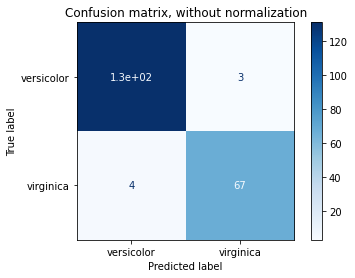

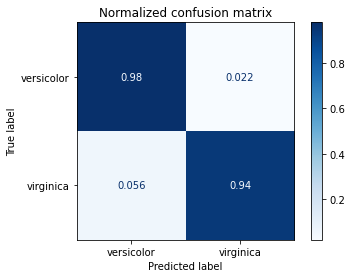

In [ ]:
redefinal = MLPClassifier(max_iter=800,learning_rate_init=0.0001,batch_size=100,random_state=44,learning_rate='adaptive').fit(X2_train, y2_train)

print("Teste de Acurácia do sklearn: ",accuracy_score(y2_test, redefinal.predict(X2_test)))
print("Há 3 falsos positivos e 4 falsos negativos.")

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(redefinal, X2_test, y2_test,
                                 display_labels=['versicolor', 'virginica'],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
print((0.9658536585365853-0.9609756097560975)*100,"%")

0.4878048780487809 %


In [ ]:
print("Podemos ver acima que a acurácia deste método é 0.5% mais precisa do que a feita")
print("na atividade passada.")